Proposed solution to FiveThirtyEight's Riddler column Oct 16, 2020 by Mark Mark
<br>
<url>https://fivethirtyeight.com/features/is-the-price-right/</url>
<br>
<br>
<i>
Riddler Express
<br>
As you may have seen in FiveThirtyEight’s reporting, there’s an election coming up. Inspired, Vikrant Kulkarni has an electoral enigma for you:

On Nov. 3, the residents of Riddler City will elect a mayor from among three candidates. The winner will be the candidate who receives an outright majority (i.e., more than 50 percent of the vote). But if no one achieves this outright majority, there will be a runoff election among the top two candidates.

If the voting shares of each candidate are uniformly distributed between 0 percent and 100 percent (subject to the constraint that they add up to 100 percent, of course), then what is the probability of a runoff?

Extra credit: Suppose there are N candidates instead of three. What is the probability of a runoff?
</i>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import ast

In [2]:
def determine_if_runoff_needed(candidate_result_list, winning_threshold = 0.50):
    """
    Check if run-off is needed by seeing if someone has a majority
    """
        
    if np.max(candidate_result_list) > winning_threshold:
        # someone won
        return False
    else:
        # run-off needed
        return True
    

def simulate_vote(number_of_candidates, atol=1e-8):
    """
    Simulate the voting process for a given number of candidates assuming
    all candidates have equal chance of getting votes.
    """
    # draw number_of_candidate random numbers and re-normalize so sum is unity
    candidate_result_list = [random.random() for _ in range(number_of_candidates)]
    candidate_result_list = np.array(candidate_result_list)/sum(candidate_result_list)
    
    # sanity check         
    if not np.isclose(sum(candidate_result_list), 1.0, atol=atol) or len(candidate_result_list) != number_of_candidates:
        print(f'Critical error -- election results do not add to unity: {np.isclose(sum(candidate_result_list), 1.0, atol=atol)} {sum(candidate_result_list)}')
        print(f'Critical error -- results list has different size than number of candidates: {len(candidate_result_list) != number_of_candidates} {len(candidate_result_list)}')
    
    # determine if the election is successful or a 
    needs_runoff = determine_if_runoff_needed(candidate_result_list=candidate_result_list)
        
    return needs_runoff

def run_elections(min_number_of_candidates=3, max_number_of_candidates=10, number_of_samples=10000):
    """
    Run multiple simulation election with a given number of candidates
    """
    # collect results for increasing number of candidates
    candidate_pool_results =[]
    for number_of_candidates in range(min_number_of_candidates, max_number_of_candidates):
        # simulate multiple times
        election_cycles = [simulate_vote(number_of_candidates=number_of_candidates) for _ in range(number_of_samples)]
        # get fraction of run-off elections needed on average
        fraction_with_runoff = np.mean(election_cycles)
        # uncertainty of the mean
        unc_fraction_with_runoff = np.std(election_cycles)/np.sqrt(len(election_cycles) - 1)

        candidate_pool_results.append([number_of_candidates, fraction_with_runoff, unc_fraction_with_runoff])
        
    return np.array(candidate_pool_results)
    
    

In [3]:
# get election results for multiple candidates
n_samples = 20000 # we can vary the number of samples to check for convergence, but here we have multiple order of magnitude between value and stat uncertainty
election_results = run_elections(number_of_samples=n_samples)
print(f'Error tolerance {round(max([el[2]/el[1] for el in election_results]),5)}')
      

Error tolerance 0.0071


In [4]:
# printout of main result
three_candidate_result = election_results[election_results[:,0]==3][0]
print(f'For three candidates, the probabilty for a run-off is: {round(three_candidate_result[1]*100,2)}+/-{round(three_candidate_result[2]*100,2)}%')
      

For three candidates, the probabilty for a run-off is: 49.82+/-0.35%


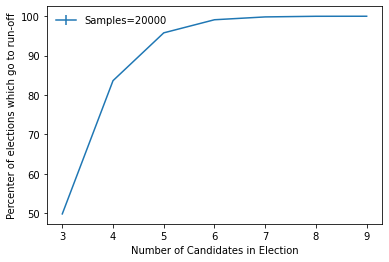

In [5]:
# plot for the extra credit
plt.errorbar(x=election_results[:,0], y=election_results[:,1]*100, yerr=election_results[:,2], label=f'Samples={n_samples}')
plt.xlabel('Number of Candidates in Election')
plt.ylabel('Percenter of elections which go to run-off')
plt.legend(frameon=False)
plt.show()

As expected, when the number of candidates grows, the number likelihood of having a runoff approaches 100%.